In [1]:
import pandas as pd
df =pd.read_csv('agricultural_raw_material.csv', parse_dates = ['Month'])

In [2]:
df.head()


,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [4]:
df = df.rename(columns = {"Hide price % change":"Hide price % Change"})

In [5]:

# Cotton proce = US Dollars per Kilogram
# Rubber price = dollars per kilogram

# Hard log price = US Dollars per Cubic Metre
# Hard sawnwood price= US Dollars per cubic meter
# Softlog price = Dollars per Cubic Meter
# Soft sawnwood price = Dollars per cubic meter

# Wood pulp price = US Dollars per Metric Ton
# Copra price = US Dollars per Metric Ton

#coarse wool price = US cents/kg
# Fine wool Price =US cents per Kilogram

# Hide price=
# Plywood price= US cents per sheets

# time series plot
# treat missing values
# standardize data
# one hot encoding 
# apply ML algorithm

In [6]:
# Since our aim is to predict the price of the raw materials, their monthly percentage change is price can be easily observed from the actual prices. Thus, the columns with percentage change are dropped.

df_1= df[df.columns.drop(list(df.filter(regex='price % Change')))]
df_1.head()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
0,Apr-90,482.34,236,1.83,"1,071.63",161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1,May-90,447.26,234,1.89,"1,057.18",172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
2,Jun-90,440.99,216,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
3,Jul-90,418.44,205,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
4,Aug-90,418.44,198,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74


In [7]:
df_percent = df[[col for col in df.columns if 'price % Change' in col]]
df_percent = df_percent.join(df_2['Date'])

NameError: name 'df_2' is not defined

In [8]:
df_percent.head()

,Coarse wool price % Change,Copra price % Change,Cotton price % Change,Fine wool price % Change,Hard log price % Change,Hard sawnwood price % Change,Hide price % Change,Plywood price % Change,Rubber price % Change,Softlog price % Change,Soft sawnwood price % Change,Wood pulp price % Change
0,-,-,-,-,-,-,-,-,-,-,-,-
1,-7.27%,-0.85%,3.28%,-1.35%,7.23%,-10.55%,-0.54%,12.09%,1.19%,3.00%,-2.63%,1.59%
2,-1.40%,-7.69%,5.29%,-15.03%,5.10%,0.71%,-1.57%,6.80%,0.00%,4.16%,-6.10%,-1.32%
3,-5.11%,-5.09%,1.01%,-0.27%,3.46%,-1.92%,-1.17%,1.21%,1.18%,-4.03%,5.03%,-3.91%
4,0.00%,-3.41%,-10.95%,6.18%,-0.97%,0.34%,-5.02%,-3.67%,2.33%,4.40%,-0.83%,2.49%


In [9]:
cols = ['Coarse wool price % Change','Copra price % Change','Cotton price % Change','Fine wool price % Change','Hard log price % Change',
       'Hard sawnwood price % Change','Hide price % Change','Plywood price % Change','Rubber price % Change','Softlog price % Change',
       'Soft sawnwood price % Change','Wood pulp price % Change', 'Date']
df_percent = df_percent[cols].replace({"%": ""}, regex = True)

KeyError: "['Date'] not in index"

In [56]:
df_percent = df_percent.iloc[1:]

In [58]:
df_percent = df_percent.set_index(['Date'])

KeyError: "None of ['Date'] are in the columns"

In [59]:
col=['Coarse wool price % Change','Copra price % Change','Cotton price % Change','Fine wool price % Change','Hard log price % Change',
       'Hard sawnwood price % Change','Hide price % Change','Plywood price % Change','Rubber price % Change','Softlog price % Change',
       'Soft sawnwood price % Change','Wood pulp price % Change']
df_percent = df_percent[col].astype('float')

In [60]:
df_percent = df_percent.dropna()

In [61]:
df_percent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 1990-05-01 to 2017-06-01
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool price % Change    326 non-null    float64
 1   Copra price % Change          326 non-null    float64
 2   Cotton price % Change         326 non-null    float64
 3   Fine wool price % Change      326 non-null    float64
 4   Hard log price % Change       326 non-null    float64
 5   Hard sawnwood price % Change  326 non-null    float64
 6   Hide price % Change           326 non-null    float64
 7   Plywood price % Change        326 non-null    float64
 8   Rubber price % Change         326 non-null    float64
 9   Softlog price % Change        326 non-null    float64
 10  Soft sawnwood price % Change  326 non-null    float64
 11  Wood pulp price % Change      326 non-null    float64
dtypes: float64(12)
memory usage: 33.1 KB


In [62]:
for colum in df_percent:
    dftest_percent = adfuller(df_percent[colum], autolag = 'AIC')
    dfoutput_percent = pd.Series(dftest_percent[0:4], index = ['Test Stats', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest_percent[4].items():
        dfoutput_percent['Critical value (%s)' %key] =value
    print(dfoutput_percent)

Test Stats                    -1.334582e+01
p-value                        5.797799e-25
#Lags Used                     0.000000e+00
Number of Observations Used    3.250000e+02
Critical value (1%)           -3.450632e+00
Critical value (5%)           -2.870474e+00
Critical value (10%)          -2.571530e+00
dtype: float64
Test Stats                    -8.402202e+00
p-value                        2.215851e-13
#Lags Used                     2.000000e+00
Number of Observations Used    3.230000e+02
Critical value (1%)           -3.450759e+00
Critical value (5%)           -2.870530e+00
Critical value (10%)          -2.571560e+00
dtype: float64
Test Stats                      -4.925622
p-value                          0.000031
#Lags Used                       9.000000
Number of Observations Used    316.000000
Critical value (1%)             -3.451215
Critical value (5%)             -2.870730
Critical value (10%)            -2.571666
dtype: float64
Test Stats                    -1.448949e+01
p

In [65]:
lag_acf_1 = acf(df_percent['Coarse wool price % Change'], nlags = 20)
lag_pacf_1 = pacf(df_percent['Coarse wool price % Change'], nlags = 20, method = 'ols')

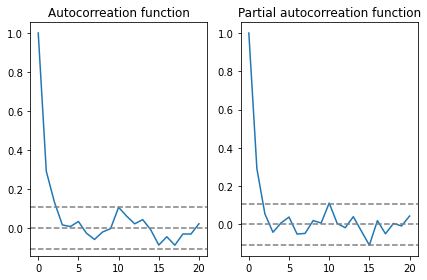

In [66]:
plt.subplot(121)
plt.plot(lag_acf_1)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_percent['Coarse wool price % Change'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_percent['Coarse wool price % Change'])), linestyle='--', color='gray')
plt.title('Autocorreation function')

#pacf

plt.subplot(122)
plt.plot(lag_pacf_1)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_percent['Coarse wool price % Change'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_percent['Coarse wool price % Change'])), linestyle='--', color='gray')
plt.title('Partial autocorreation function')

plt.tight_layout()

In [82]:
from statsmodels.tsa.arima_model import ARIMA
model_1 = ARIMA(df_percent['Coarse wool price % Change'], order = (2,1,2))
res_AR_1= model_1.fit(disp=-1)

c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [83]:
pred_diff_1 = pd.Series(res_AR_1.fittedvalues, copy = True)
print(pred_diff_1.head())

Date
1990-06-01    0.003168
1990-07-01   -2.295230
1990-08-01    0.479925
1990-09-01   -2.686689
1990-10-01   -0.929232
dtype: float64


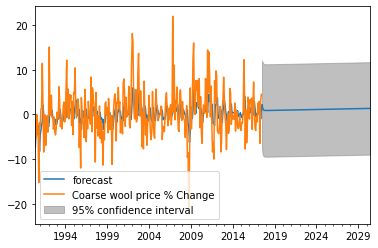

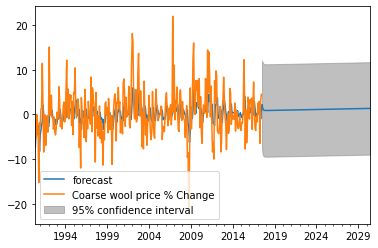

In [84]:
res_AR_1.plot_predict(1,481)
#x = res_AR_1.forecast(steps = 120)

c:\program files\python38\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


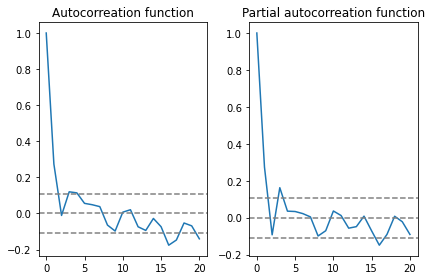

In [85]:
lag_acf_2 = acf(df_percent['Copra price % Change'], nlags = 20)
lag_pacf_2 = pacf(df_percent['Copra price % Change'], nlags = 20, method = 'ols')

plt.subplot(121)
plt.plot(lag_acf_2)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_percent['Copra price % Change'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_percent['Copra price % Change'])), linestyle='--', color='gray')
plt.title('Autocorreation function')

#pacf

plt.subplot(122)
plt.plot(lag_pacf_2)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_percent['Copra price % Change'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_percent['Copra price % Change'])), linestyle='--', color='gray')
plt.title('Partial autocorreation function')

plt.tight_layout()

c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


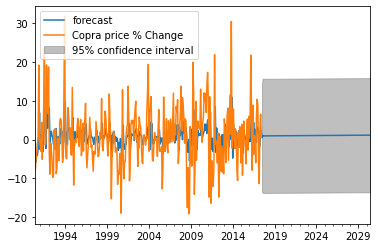

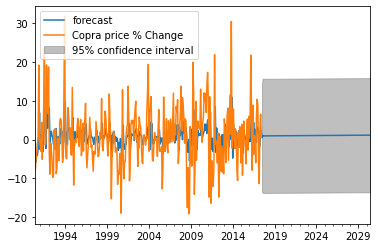

In [86]:
from statsmodels.tsa.arima_model import ARIMA
model_2 = ARIMA(df_percent['Copra price % Change'], order = (2,1,2))
res_AR_2= model_2.fit(disp=-1)

res_AR_2.plot_predict(1,481)
#x = res_AR_1.forecast(steps = 120)

In [7]:
# Certain numeric values in the price columns contains , which needs to be replaced by blank. Also, some numeric values columns has data types of object. Convert object into float.
# There are certain missing values that are filled by using mean.
cols = ['Coarse wool Price','Softlog Price', 'Fine wool Price', 'Copra Price']
df_1[cols] =df[cols].replace({',': ''}, regex=True)
df_1['Coarse wool Price'] = df_1['Coarse wool Price'].astype(float)
df_1['Copra Price'] = df_1['Copra Price'].astype(float)
df_1['Fine wool Price'] = df_1['Fine wool Price'].astype(float)
df_1 = df_1.fillna(df_1.mean())

C:\Users\divya\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-7-631cde3a38be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Coarse wool Price'] = df_1['Coarse wool Price'].astype(float)
<ipython-input-7-631cde3a38be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                361 non-null    object 
 1   Coarse wool Price    361 non-null    float64
 2   Copra Price          361 non-null    float64
 3   Cotton Price         361 non-null    float64
 4   Fine wool Price      361 non-null    float64
 5   Hard log Price       361 non-null    float64
 6   Hard sawnwood Price  361 non-null    float64
 7   Hide Price           361 non-null    float64
 8   Plywood Price        361 non-null    float64
 9   Rubber Price         361 non-null    float64
 10  Softlog Price        361 non-null    float64
 11  Soft sawnwood Price  361 non-null    float64
 12  Wood pulp Price      361 non-null    float64
dtypes: float64(12), object(1)
memory usage: 36.8+ KB


In [9]:
# Month and year is separated into two columns
df_1[['Month', 'Year']] = df_1.Month.str.split("-",expand=True)


In [10]:
df_1.head()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,Year
0,Apr,482.34,236.0,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29,90
1,May,447.26,234.0,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51,90
2,Jun,440.99,216.0,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35,90
3,Jul,418.44,205.0,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83,90
4,Aug,418.44,198.0,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74,90


In [11]:
# String values in Month is converted into numeric values
look_up = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', "May": '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

df_1['Month'] = df_1['Month'].apply(lambda x: look_up[x])

In [12]:
#Convert year values into proper format
df_1['Year'] = df_1['Year'].astype(int)
df_1['year'] = [1900+x if 90<=x<=99 else 2000+x for x in df_1['Year']] 


In [13]:
df_1['year'].tail()

356    2019
357    2020
358    2020
359    2020
360    2020
Name: year, dtype: int64

In [14]:
# Create Date column that acts as datetime column and assign date as 01.
df_1['Date'] = pd.to_datetime(df_1[['year', 'Month']].assign(Day=1))
df_1.head()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,Year,year,Date
0,04,482.34,236.0,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29,90,1990,1990-04-01
1,05,447.26,234.0,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51,90,1990,1990-05-01
2,06,440.99,216.0,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35,90,1990,1990-06-01
3,07,418.44,205.0,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83,90,1990,1990-07-01
4,08,418.44,198.0,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74,90,1990,1990-08-01


In [15]:
# Keep only Date column
df_2 = df_1.drop(['Month', 'Year', 'year'], axis =1)
df_2.tail()


,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,Date
356,626.333731,542.023805,1.67,850.119572,272.80,707.950367,78.566667,500.37,1.66,164.527462,291.061713,875.000000,2019-12-01
357,626.333731,542.023805,1.74,850.119572,272.40,707.950367,78.566667,499.64,1.68,164.527462,291.061713,875.000000,2020-01-01
358,626.333731,542.023805,1.69,850.119572,270.56,707.950367,78.566667,496.28,1.61,164.527462,291.061713,875.000000,2020-02-01
359,626.333731,542.023805,1.49,850.119572,276.93,707.950367,78.566667,507.96,1.50,164.527462,291.061713,875.000000,2020-03-01
360,626.333731,542.023805,1.40,850.119572,276.24,707.950367,78.566667,506.68,1.33,164.527462,291.061713,696.670889,2020-04-01


In [16]:
df_2.head()

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,Date
0,482.34,236.0,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29,1990-04-01
1,447.26,234.0,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51,1990-05-01
2,440.99,216.0,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35,1990-06-01
3,418.44,205.0,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83,1990-07-01
4,418.44,198.0,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74,1990-08-01


In [17]:
df_3 = df_2.set_index(['Date'])
df_3.head()
df_3.shape

(361, 12)

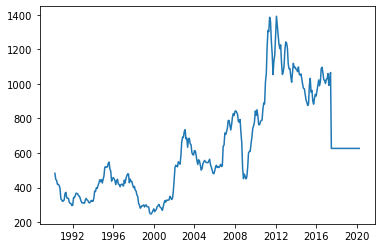

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_3['Coarse wool Price'])

In [19]:
#Determining rolling stats
rol_stat_mean = df_3.rolling(window =12).mean()
rol_stat_std = df_3.rolling(window =12).std()

print(rol_stat_mean, rol_stat_std)

            Coarse wool Price  Copra Price  Cotton Price  Fine wool Price  \
Date                                                                        
1990-04-01                NaN          NaN           NaN              NaN   
1990-05-01                NaN          NaN           NaN              NaN   
1990-06-01                NaN          NaN           NaN              NaN   
1990-07-01                NaN          NaN           NaN              NaN   
1990-08-01                NaN          NaN           NaN              NaN   
...                       ...          ...           ...              ...   
2019-12-01         626.333731   542.023805      1.717500       850.119572   
2020-01-01         626.333731   542.023805      1.710833       850.119572   
2020-02-01         626.333731   542.023805      1.702500       850.119572   
2020-03-01         626.333731   542.023805      1.672500       850.119572   
2020-04-01         626.333731   542.023805      1.629167       850.119572   

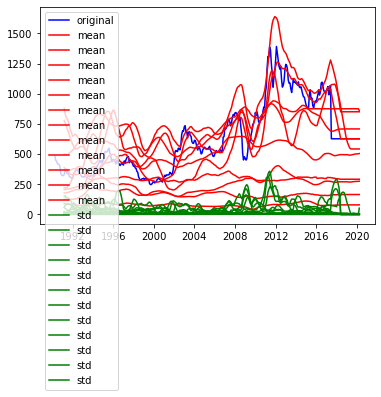

In [20]:
orig = plt.plot(df_3['Coarse wool Price'], color = 'blue', label = 'original')
mean = plt.plot(rol_stat_mean, color = 'red', label = 'mean')
std = plt.plot(rol_stat_std, color = 'green', label = 'std')
plt.legend(loc='best')
plt.show(block = False)

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey Fuller Test:')

for col in df_3:
    dftest = adfuller(df_3[col], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Stats', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] =value
    print(dfoutput)

Result of Dickey Fuller Test:
Test Stats                      -1.638766
p-value                          0.462905
#Lags Used                       4.000000
Number of Observations Used    356.000000
Critical value (1%)             -3.448853
Critical value (5%)             -2.869693
Critical value (10%)            -2.571114
dtype: float64
Test Stats                      -3.035040
p-value                          0.031749
#Lags Used                      11.000000
Number of Observations Used    349.000000
Critical value (1%)             -3.449227
Critical value (5%)             -2.869857
Critical value (10%)            -2.571201
dtype: float64
Test Stats                      -3.533096
p-value                          0.007177
#Lags Used                      10.000000
Number of Observations Used    350.000000
Critical value (1%)             -3.449173
Critical value (5%)             -2.869833
Critical value (10%)            -2.571188
dtype: float64
Test Stats                      -2.350323
p

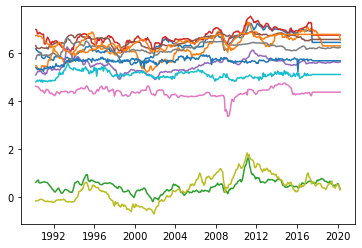

In [22]:
# p-value is less than 0.5 so this is fine. However, critical values are not close enough and thus data is not stationary. Thus, certain mathematical operations is applied
import numpy as np
df3_log = np.log(df_3)
plt.plot(df3_log)


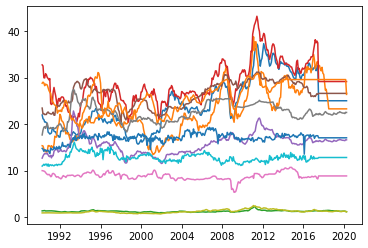

In [23]:
df3_sqrt = np.sqrt(df_3)
plt.plot(df3_sqrt)

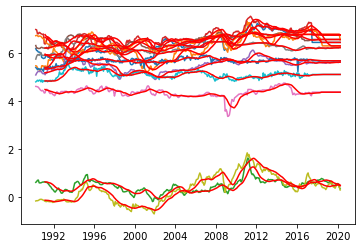

In [24]:
moving_average = df3_log.rolling(window = 12).mean()
moving_std = df3_log.rolling(window = 12).std()
plt.plot(df3_log)
plt.plot(moving_average, color = 'red')

In [25]:
for col in df3_log:
    dftest_log = adfuller(df3_log[col], autolag = 'AIC')
    dfoutput_log = pd.Series(dftest_log[0:4], index = ['Test Stats', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest_log[4].items():
        dfoutput_log['Critical value (%s)' %key] =value
    print(dfoutput_log)

Test Stats                      -1.521067
p-value                          0.523065
#Lags Used                       1.000000
Number of Observations Used    359.000000
Critical value (1%)             -3.448697
Critical value (5%)             -2.869625
Critical value (10%)            -2.571077
dtype: float64
Test Stats                      -2.660425
p-value                          0.081140
#Lags Used                       3.000000
Number of Observations Used    357.000000
Critical value (1%)             -3.448801
Critical value (5%)             -2.869670
Critical value (10%)            -2.571101
dtype: float64
Test Stats                      -3.278868
p-value                          0.015850
#Lags Used                      10.000000
Number of Observations Used    350.000000
Critical value (1%)             -3.449173
Critical value (5%)             -2.869833
Critical value (10%)            -2.571188
dtype: float64
Test Stats                      -2.804626
p-value                        

In [26]:
for col in df3_sqrt:
    dftest_sqrt = adfuller(df3_sqrt[col], autolag = 'AIC')
    dfoutput_sqrt = pd.Series(dftest_sqrt[0:4], index = ['Test Stats', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest_sqrt[4].items():
        dfoutput_sqrt['Critical value (%s)' %key] =value
    print(dfoutput_sqrt)

Test Stats                      -1.590908
p-value                          0.488159
#Lags Used                       1.000000
Number of Observations Used    359.000000
Critical value (1%)             -3.448697
Critical value (5%)             -2.869625
Critical value (10%)            -2.571077
dtype: float64
Test Stats                      -2.478598
p-value                          0.120769
#Lags Used                       8.000000
Number of Observations Used    352.000000
Critical value (1%)             -3.449065
Critical value (5%)             -2.869786
Critical value (10%)            -2.571163
dtype: float64
Test Stats                      -3.403515
p-value                          0.010840
#Lags Used                      10.000000
Number of Observations Used    350.000000
Critical value (1%)             -3.449173
Critical value (5%)             -2.869833
Critical value (10%)            -2.571188
dtype: float64
Test Stats                      -2.806789
p-value                        

In [27]:
dataset_minus_moving_average = df3_log - moving_average
dataset_minus_moving_average.head()

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Date,,,,,,,,,,,,
1990-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
dataset_minus_moving_average.dropna(inplace = True)
dataset_minus_moving_average.head()

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Date,,,,,,,,,,,,
1991-03-01,-0.155294,0.068883,-0.000218,-0.388887,-0.083533,-0.016515,-0.138174,-0.006793,-0.043823,-0.020097,0.023475,-0.169059
1991-04-01,-0.023855,0.021046,-0.016478,-0.323709,-0.013615,0.000935,-0.005071,-0.009858,-0.053937,0.003339,0.017256,-0.205431
1991-05-01,0.007955,0.032834,-0.018813,-0.101451,-0.023049,0.026436,0.030371,-0.020329,-0.050942,-0.018238,0.027287,-0.186856
1991-06-01,-0.058381,0.103059,-0.031742,-0.013965,0.108660,-0.030496,0.017464,-0.030052,-0.025859,-0.029585,0.095237,-0.196501
1991-07-01,-0.049665,0.282973,-0.063769,-0.068182,0.137895,-0.029537,-0.003380,-0.014423,-0.045987,0.007895,0.044896,-0.182065


In [29]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    moving_ave = timeseries.rolling(window = 12).mean()
    moving_std = timeseries.rolling(window = 12).std()
    orig = plt.plot(df_3['Coarse wool Price'], color = 'blue', label = 'original')
    mean = plt.plot(rol_stat_mean, color = 'red', label = 'mean')
    std = plt.plot(rol_stat_std, color = 'green', label = 'std')
    plt.legend(loc='best')
    plt.show(block = False)
    
    for col in df_3:
        dftest = adfuller(df_3[col], autolag = 'AIC')
        dfoutput = pd.Series(dftest[0:4], index = ['Test Stats', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput['Critical value (%s)' %key] =value
        print(dfoutput)

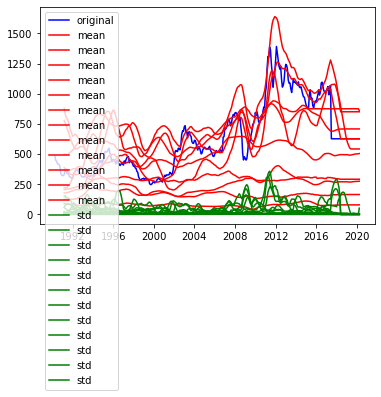

Test Stats                      -1.638766
p-value                          0.462905
#Lags Used                       4.000000
Number of Observations Used    356.000000
Critical value (1%)             -3.448853
Critical value (5%)             -2.869693
Critical value (10%)            -2.571114
dtype: float64
Test Stats                      -3.035040
p-value                          0.031749
#Lags Used                      11.000000
Number of Observations Used    349.000000
Critical value (1%)             -3.449227
Critical value (5%)             -2.869857
Critical value (10%)            -2.571201
dtype: float64
Test Stats                      -3.533096
p-value                          0.007177
#Lags Used                      10.000000
Number of Observations Used    350.000000
Critical value (1%)             -3.449173
Critical value (5%)             -2.869833
Critical value (10%)            -2.571188
dtype: float64
Test Stats                      -2.350323
p-value                        

In [30]:
test_stationary(dataset_minus_moving_average)

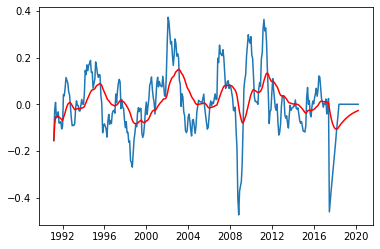

In [31]:
exp_decay_wa = dataset_minus_moving_average.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(dataset_minus_moving_average['Coarse wool Price'])
plt.plot(exp_decay_wa['Coarse wool Price'], color = 'red')

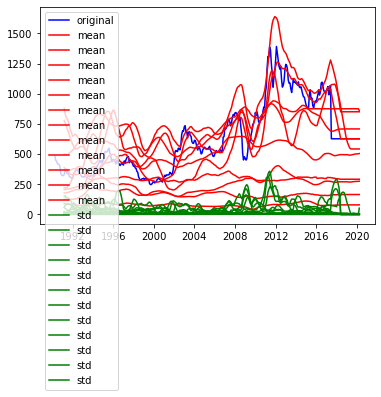

Test Stats                      -1.638766
p-value                          0.462905
#Lags Used                       4.000000
Number of Observations Used    356.000000
Critical value (1%)             -3.448853
Critical value (5%)             -2.869693
Critical value (10%)            -2.571114
dtype: float64
Test Stats                      -3.035040
p-value                          0.031749
#Lags Used                      11.000000
Number of Observations Used    349.000000
Critical value (1%)             -3.449227
Critical value (5%)             -2.869857
Critical value (10%)            -2.571201
dtype: float64
Test Stats                      -3.533096
p-value                          0.007177
#Lags Used                      10.000000
Number of Observations Used    350.000000
Critical value (1%)             -3.449173
Critical value (5%)             -2.869833
Critical value (10%)            -2.571188
dtype: float64
Test Stats                      -2.350323
p-value                        

In [32]:
scale_log_minus_exp = dataset_minus_moving_average - exp_decay_wa
test_stationary(scale_log_minus_exp)

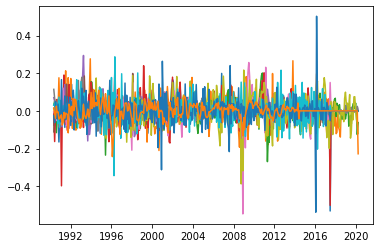

In [33]:
dataset_minus_moving_average_shift = df3_log - df3_log.shift()
plt.plot(dataset_minus_moving_average_shift)

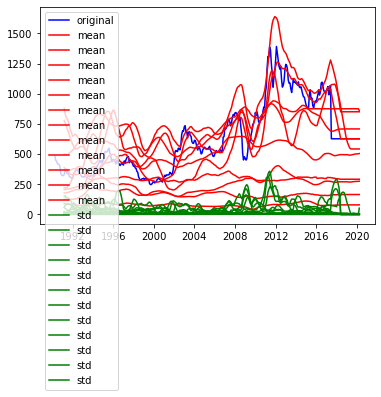

Test Stats                      -1.638766
p-value                          0.462905
#Lags Used                       4.000000
Number of Observations Used    356.000000
Critical value (1%)             -3.448853
Critical value (5%)             -2.869693
Critical value (10%)            -2.571114
dtype: float64
Test Stats                      -3.035040
p-value                          0.031749
#Lags Used                      11.000000
Number of Observations Used    349.000000
Critical value (1%)             -3.449227
Critical value (5%)             -2.869857
Critical value (10%)            -2.571201
dtype: float64
Test Stats                      -3.533096
p-value                          0.007177
#Lags Used                      10.000000
Number of Observations Used    350.000000
Critical value (1%)             -3.449173
Critical value (5%)             -2.869833
Critical value (10%)            -2.571188
dtype: float64
Test Stats                      -2.350323
p-value                        

In [34]:
test_stationary(dataset_minus_moving_average_shift)

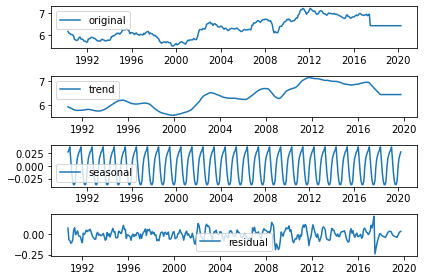

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df3_log['Coarse wool Price'])
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(df3_log['Coarse wool Price'], label = 'original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'residual')
plt.legend(loc='best')

plt.tight_layout()


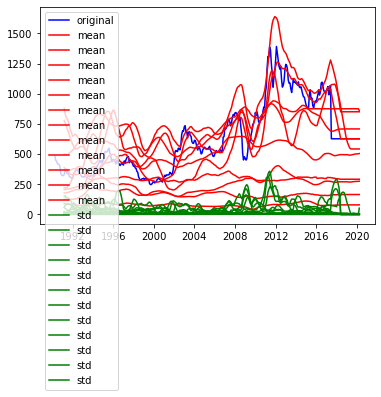

Test Stats                      -1.638766
p-value                          0.462905
#Lags Used                       4.000000
Number of Observations Used    356.000000
Critical value (1%)             -3.448853
Critical value (5%)             -2.869693
Critical value (10%)            -2.571114
dtype: float64
Test Stats                      -3.035040
p-value                          0.031749
#Lags Used                      11.000000
Number of Observations Used    349.000000
Critical value (1%)             -3.449227
Critical value (5%)             -2.869857
Critical value (10%)            -2.571201
dtype: float64
Test Stats                      -3.533096
p-value                          0.007177
#Lags Used                      10.000000
Number of Observations Used    350.000000
Critical value (1%)             -3.449173
Critical value (5%)             -2.869833
Critical value (10%)            -2.571188
dtype: float64
Test Stats                      -2.350323
p-value                        

In [36]:
data_residual = residual
data_residual.dropna(inplace = True)
test_stationary(data_residual)

In [37]:
dataset_minus_moving_average.shape

(350, 12)

In [38]:
from statsmodels.tsa.stattools import acf,pacf

In [39]:

dataset_minus_moving_average_shift.dropna(inplace =True)

In [40]:
dataset_minus_moving_average_shift.head()

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Date,,,,,,,,,,,,
1990-05-01,-0.075509,-0.008511,0.032261,-0.013576,0.069836,-0.111520,-0.005415,0.114120,0.011834,0.029560,-0.026683,0.015816
1990-06-01,-0.014118,-0.080043,0.051558,-0.162923,0.049710,0.007111,-0.015809,0.065819,0.000000,0.040758,-0.062975,-0.013335
1990-07-01,-0.052489,-0.052268,0.010000,-0.002687,0.034037,-0.019425,-0.011816,0.012068,0.011696,-0.041160,0.049028,-0.039903
1990-08-01,0.000000,-0.034743,-0.115919,0.059995,-0.009784,0.003411,-0.051538,-0.037362,0.022990,0.043089,-0.008366,0.024618
1990-09-01,-0.015073,-0.010152,0.000000,-0.015308,-0.004307,0.000472,-0.047127,0.054235,0.022473,0.000617,-0.042714,-0.008734


In [41]:
lag_acf = acf(dataset_minus_moving_average_shift['Coarse wool Price'], nlags = 20)
lag_pacf = pacf(dataset_minus_moving_average_shift['Coarse wool Price'], nlags = 20, method = 'ols')

c:\program files\python38\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


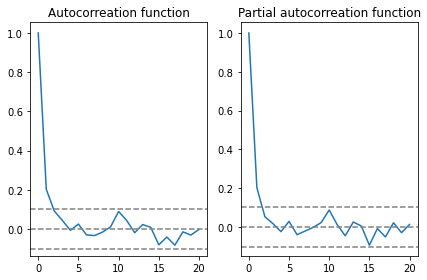

In [42]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_minus_moving_average_shift['Coarse wool Price'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_minus_moving_average_shift['Coarse wool Price'])), linestyle='--', color='gray')
plt.title('Autocorreation function')

#pacf

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_minus_moving_average_shift['Coarse wool Price'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_minus_moving_average_shift['Coarse wool Price'])), linestyle='--', color='gray')
plt.title('Partial autocorreation function')

plt.tight_layout()

c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\program files\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


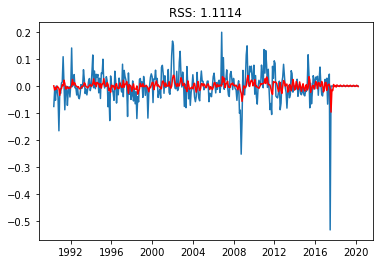

In [43]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df3_log['Coarse wool Price'], order = (4,1,4))
res_AR= model.fit(disp=-1)
plt.plot(dataset_minus_moving_average_shift['Coarse wool Price'])
plt.plot(res_AR.fittedvalues, color='red')
plt.title("RSS: %.4f"% sum((res_AR.fittedvalues-dataset_minus_moving_average_shift['Coarse wool Price'])**2))
print('Plotting AR model')

In [44]:
pred_diff = pd.Series(res_AR.fittedvalues, copy = True)
print(pred_diff.head())

Date
1990-05-01    0.000655
1990-06-01   -0.014877
1990-07-01   -0.005913
1990-08-01   -0.012012
1990-09-01   -0.000521
dtype: float64


In [45]:
pred_diff_cumsum = pred_diff.cumsum()
print(pred_diff_cumsum.head())

Date
1990-05-01    0.000655
1990-06-01   -0.014222
1990-07-01   -0.020135
1990-08-01   -0.032147
1990-09-01   -0.032668
dtype: float64


In [46]:
pred_log = pd.Series(df3_log['Coarse wool Price'].iloc[0], index = df3_log['Coarse wool Price'].index)
pred_log = pred_log.add(pred_diff.cumsum(), fill_value = 0)
pred_log.head()

Date
1990-04-01    6.178649
1990-05-01    6.179304
1990-06-01    6.164427
1990-07-01    6.158514
1990-08-01    6.146502
dtype: float64

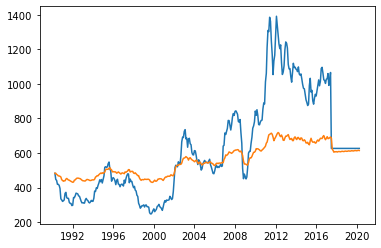

In [47]:
pred_ARIMA = np.exp(pred_log)
plt.plot(df_3['Coarse wool Price'])
plt.plot(pred_ARIMA)

In [48]:
df3_log.shape

(361, 12)

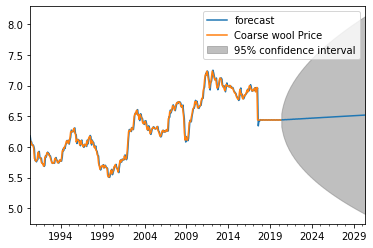

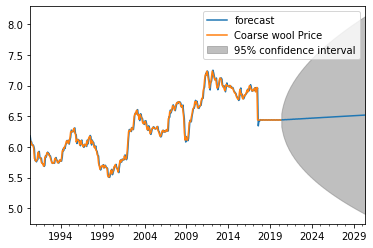

In [49]:
res_AR.plot_predict(1,481)
#x = res_AR.forecast(steps = 120)

In [50]:
from plotly.offline import iplot
import plotly as pt
import plotly.tools as tls
import cufflinks as cf
pt.offline.init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
#import plotly.express as px
#fig = px.line(df_2, x='Date', y='Coarse wool Price')
#fig.show()

In [51]:


# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Coarse wool Price'],
                    mode = "lines",
                    name = "Coarse wool Price (cents/kg)",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

#Creating trace2

trace2 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Fine wool Price'],
                    mode = "lines",
                    name = "Fine wool Price",
                    marker = dict(color = 'rgba(0, 0, 255, 0.3)'))

data = [trace1, trace2]
layout = dict(title = 'Materials prices_similar units',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
             yaxis=dict(title='Price(cents/kg)'))
fig = dict(data = data, layout = layout)
iplot(fig)


# Creating trace3
trace3 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Copra Price'],
                    mode = "lines",
                    name = "Copra Price",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))

# Creating trace4
trace4 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Wood pulp Price'],
                    mode = "lines",
                    name = "Wood pulp price",
                    marker = dict(color = 'rgba(0, 0, 255, 0.3)'))

data = [trace3, trace4]
layout = dict(title = 'Materials prices_similar units',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
             yaxis=dict(title='Price ($/metric ton)'))
fig = dict(data = data, layout = layout)
iplot(fig)

# Creating trace5
trace5 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Hard log Price'],
                    mode = "lines",
                    name = "Hard log Price",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'))



# Creating trace6
trace6 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Hard sawnwood Price'],
                    mode = "lines",
                    name = "Hard sawnwood Price",
                    marker = dict(color = 'rgba(0, 0, 255, 0.3)'))

# Creating trace7
trace7 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Softlog Price'],
                    mode = "lines",
                    name = "Softlog Price",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))



# Creating trace8
trace8 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Soft sawnwood Price'],
                    mode = "lines",
                    name = "Soft sawnwood Price",
                    marker = dict(color = 'rgba(255, 0, 0, 0.3)'))

data = [trace5, trace6, trace7, trace8]
layout = dict(title = 'Materials prices_similar units',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
             yaxis=dict(title= 'Price($/cubic meter)'))
fig = dict(data = data, layout = layout)
iplot(fig)

# Creating trace9
trace9 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Cotton Price'],
                    mode = "lines",
                    name = "Cotton Price",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

# Creating trace10
trace10 = go.Scatter(
                    x = df_2.Date,
                    y = df_2['Rubber Price'],
                    mode = "lines",
                    name = "Rubber Price",
                    marker = dict(color = 'rgba(255, 0, 0, 0.3)'))

data = [trace9, trace10]
layout = dict(title = 'Materials prices_similar units',
              xaxis= dict(title= 'Year',ticklen= 5,zeroline= False),
              yaxis=dict(title='Price ($/kg)'))
fig = dict(data = data, layout = layout)
iplot(fig)

fig = px.line(df_2, x='Date', y='Plywood Price')

fig.update_layout(
    title="Plywood Price",
    xaxis_title="Year",
    yaxis_title='Plywood Price ($/sheet)')
fig.show()


fig = px.line(df_2, x='Date', y='Hide Price')
fig.update_layout(
    title="Hide Price",
    xaxis_title="Year",
    yaxis_title='Hide Price (cents/pounds)')
fig.show()

In [52]:
#It is observed that there is a maximum spike in most of the raw materials prices either around 2011 or/and 1993.
# However, there is not much change in the price of soft sawnwood price and softlog price.
# It is only hide price that have maximum spike in 2014 while there is a drastic decrease in its price in 2009.
# With the plots,rise and fall of prices on a monthly basis can be easily seen and it shows non-linear relation with the date time parameter.

In [53]:
#import sklearn
#from sklearn.preprocessing import MinMaxScaler
#columns_to_scale = ['Coarse wool Price', 'Fine wool Price', 'Copra Price', 'Wood pulp Price', 'Hard log Price','Hard sawnwood Price',
                  # 'Softlog Price', 'Soft sawnwood Price', 'Cotton Price', 'Rubber Price', 'Plywood Price','Hide Price']
#df_3 = pd.DataFrame(df_1[columns_to_scale])df_6 = pd.DataFrame(x_scaled, columns = [])
#columns_date = ['Month', 'Year']
#df_3.head()
#scaler= MinMaxScaler()
#scaled= scaler.fit_transform(df_3)
#df_4= pd.DataFrame(scaled)
#df_4.head()
#scaler.fit_transform(df_1[columns_to_scale])
#import seaborn as sns
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(20,20))
#sns.heatmap(df_3, ax = ax)

In [54]:
# To predict the price of the raw materials, the input variables were taken as month and year while target variables are all the rest columns of raw material prices.
# It is assumed that the prices of each material is independent of other but dependent on the month and year.
# Although, there should be more data that tells about demand, supply and other crop production criteria that should mainly determines the price change.
X= df_1[['Month', 'year']]
#y = df_1[['Coarse wool Price', 'Fine wool Price', 'Copra Price', 'Wood pulp Price', 'Hard log Price','Hard sawnwood Price','Softlog Price', 'Soft sawnwood Price', 'Cotton Price', 'Rubber Price', 'Plywood Price','Hide Price']]
y = df_1[['Coarse wool Price']]
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state =42)
X_train.shape, y_train.shape

((216, 2), (216, 12))

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regression = DecisionTreeRegressor(max_depth=15, random_state = 30)
MSE_CV = cross_val_score(regression, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')
regression.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=30, splitter='best')

In [56]:
y_pred = regression.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
mean_absolute_error(y_test,y_pred)

15.054999186247585

In [ ]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test

In [ ]:
run_single_tree(X_train, y_train, X_test, y_test, 15)

In [ ]:
from sklearn.model_selection import GridSearchCV
params_dt = { 'max_depth': [5,10,15, 20, 25], 'min_samples_leaf': [0.02, 0.04,0.06,0.08,1], 'max_features': [0.2,0.4,0.6,0.8,1.0]}
grid_cv = GridSearchCV(estimator = regression, param_grid= params_dt, cv=10)
grid_cv.fit(X_train, y_train)

In [ ]:
best_hyperparams = grid_cv.best_params_

In [ ]:
print(best_hyperparams)

In [ ]:
best_model = grid_cv.best_estimator_
test_acc = best_model.score(X_test,y_test) 

In [ ]:
print(test_acc)

In [ ]:
pd.DataFrame(y_pred, X_test, columns = ['Coarse wool Price', 'Fine wool Price', 'Copra Price', 'Wood pulp Price', 'Hard log Price','Hard sawnwood Price','Softlog Price', 'Soft sawnwood Price', 'Cotton Price', 'Rubber Price', 'Plywood Price','Hide Price'])

In [ ]:
df_6.head()

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Coarse wool Price', 'Fine wool Price', 'Copra Price', 'Wood pulp Price', 'Hard log Price','Hard sawnwood Price',
                    'Softlog Price', 'Soft sawnwood Price', 'Cotton Price', 'Rubber Price', 'Plywood Price','Hide Price']
df_3 = pd.DataFrame(df_1[columns_to_scale])
columns_date = ['Month', 'Year']
df_3.head()
scaler= MinMaxScaler()
scaled= scaler.fit_transform(df_3)
df_4= pd.DataFrame(scaled)
df_4.head()
scaler.fit_transform(df_1[columns_to_scale])
df_6 = pd.DataFrame(scaled, columns = columns_to_scale)

In [ ]:
df_6.head()

In [ ]:
df_6.corr(method='pearson')

In [ ]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [ ]:
NumberOfElements = len(df_1)

In [ ]:
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = df_1[0:TrainingSize]
TestData = df_1[TrainingSize:NumberOfElements]

In [ ]:
Actual = [x for x in TrainingData]
Predictions = list()